# LAB: Ensambles para clasificación de dígitos

## INTRODUCCION

Vamos a utilizar un dataset de `sklearn` para realizar una clasificación de imágenes de dígitos manuscritos. El objetivo es lograr clasificar a qué dígito pertenece cada una de las imágenes.

Para eso vamos a usar los modelos vistos.

Veamos brevemente la estructura de los datos. Básicamente 

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [0]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
digits.images.shape

(1797, 8, 8)

In [0]:
digits.data.shape

(1797, 64)

In [0]:
digits.target_names.shape

(10,)

In [0]:
digits.target.shape

(1797,)

In [0]:
digits.images[0:2]

array([[[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
        [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
        [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
        [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]])

In [0]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
from sklearn.ensemble import RandomForestClassifier

Visualizemos algunos registros del dataset.

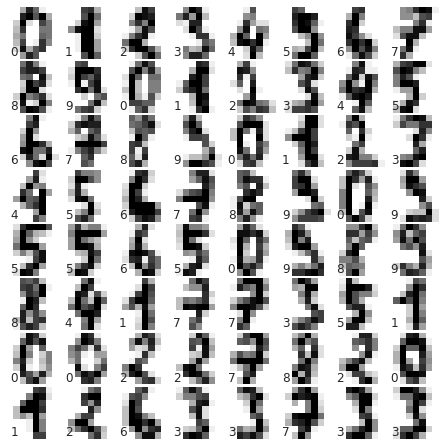

In [0]:
# Generamos los gráficos
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Ploteamos los dígitos: cada imagen es de 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # etiquetamos la imagen con el target value
    ax.text(0, 7, str(digits.target[i]))

## Random Forest

Podemos usar un clasificador de dígitos muy rápidamente utilizando un Random Forest:

In [0]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Veamos el reporte de clasificación:

In [0]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.95      0.97        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.96      0.96      0.96        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.96      0.97        48

avg / total       0.98      0.98      0.98       450



Y para evaluarlo, podemos usar la matriz de confusión:

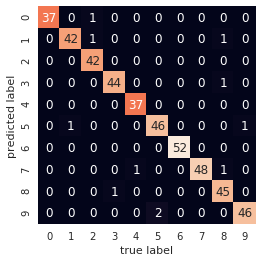

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Es interesante ver cómo un clasificador basado en Random Forest (sin ningún tipo de tuneo) resulta en una muy precisa clasisicación de los datos de dígitos.

## Extra Tree

Probemos ahora un Extra Tree.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=1000, class_weight='balanced')

In [0]:
et.fit(Xtrain, ytrain)
ypred_et = et.predict(Xtest)

In [0]:
print(metrics.classification_report(ypred_et, ytest))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.98      0.98      0.98        43
          2       1.00      1.00      1.00        44
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.94      0.96        50
          6       1.00      1.00      1.00        52
          7       1.00      0.98      0.99        49
          8       0.96      0.98      0.97        47
          9       0.96      0.98      0.97        46

avg / total       0.98      0.98      0.98       450



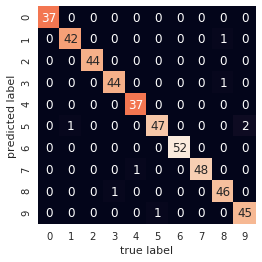

In [0]:
mat = confusion_matrix(ytest, ypred_et)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Gradient Boosting

¿Qué sucede si usamos un GradientBoosting con los parámetros por defecto?

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gb = GradientBoostingClassifier()

In [0]:
gb.fit(Xtrain, ytrain)
ypred_gb = gb.predict(Xtest)

In [0]:
print(metrics.classification_report(ypred_gb, ytest))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96        38
          1       0.98      0.95      0.97        44
          2       0.98      1.00      0.99        43
          3       0.93      0.98      0.95        43
          4       0.95      0.97      0.96        37
          5       0.96      0.96      0.96        48
          6       0.94      1.00      0.97        49
          7       0.98      0.96      0.97        49
          8       0.98      0.90      0.94        52
          9       0.94      0.94      0.94        47

avg / total       0.96      0.96      0.96       450



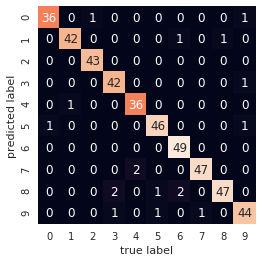

In [0]:
mat = confusion_matrix(ytest, ypred_gb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## AdaBoost

Probemos ahora con un AdaBoost con los parámetros por defecto:

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

In [0]:
ab.fit(Xtrain, ytrain)
ypred_ab = ab.predict(Xtest)

In [0]:
print(metrics.classification_report(ypred_ab, ytest))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89        37
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.08      0.08      0.08        36
          5       0.02      1.00      0.04         1
          6       0.46      0.26      0.34        91
          7       0.90      0.16      0.28       262
          8       0.00      0.00      0.00         0
          9       0.30      0.61      0.40        23

avg / total       0.71      0.26      0.33       450



/home/digitalhouse/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


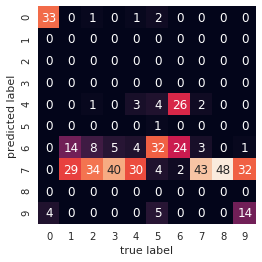

In [0]:
mat = confusion_matrix(ytest, ypred_ab)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Seguramente podrán ver que AdaBoost parece tener una performance notablemente peor que la de los modelos anteriores. Una posibilidad, entonces, es tratar de tunear los hiperparámetros para buscar mejorar su performance.

Tengan en cuenta que la "arquitectura" de AdaBoost es diferente. Unos de sus parámetros es `base_estimator`. Por defecto, `AdaBoostClassifier` utiliza un árbol de decisión (es decir, `base_estimator=DecisionTreeClassifier()`). Por lo cual deben tener en cuenta este hecho al momento de definir la grilla de parámetros para la búsqueda: hay algunos parámetros que corresponden al `base_estimator` -en este caso, árboles- y otros que corresponden a `AdaBoostClassifier`.

**Pista**: pueden pasar parámetros de cada estimador de forma análoga a cómo los pasan en un pipeline: `{'base_estimator__[parametro_del_base_estimator': [grilla]}`

In [0]:
params = {"base_estimator__max_depth": [1, 10, 50],
          "base_estimator__min_samples_split": [5, 10, 15], 
          "base_estimator__max_features": [5, 25, 61],
          "base_estimator__min_samples_leaf": [5, 10, 15],
          "n_estimators": [100, 500],
          "learning_rate":[0.01, 0.1, 1.0]
         }

grid_ab = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params, n_iter=150, verbose=1)
grid_ab.fit(Xtrain, ytrain)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 11.1min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=150, n_jobs=1,
          param_distributions={'base_estimator__max_depth': [1, 10, 50], 'base_estimator__min_samples_split': [5, 10, 15], 'base_estimator__max_features': [5, 25, 61], 'base_estimator__min_samples_leaf': [5, 10, 15], 'n_estimators': [100, 500], 'learning_rate': [0.01, 0.1, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scorin

In [0]:
grid_ab.best_score_

0.98144023756495913

In [0]:
ypred_ab_tuned = grid_ab.predict(Xtest)

In [0]:
print(metrics.classification_report(ypred_ab_tuned, ytest))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.98      0.95      0.97        44
          2       1.00      1.00      1.00        44
          3       0.98      1.00      0.99        44
          4       0.97      1.00      0.99        37
          5       0.96      0.96      0.96        48
          6       0.98      1.00      0.99        51
          7       1.00      0.98      0.99        49
          8       0.98      0.98      0.98        48
          9       0.98      0.96      0.97        48

avg / total       0.98      0.98      0.98       450



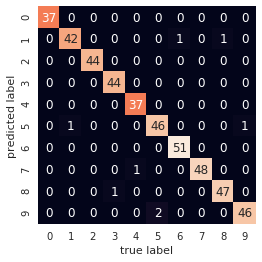

In [0]:
mat = confusion_matrix(ytest, ypred_ab_tuned)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## BONUS

Traten de mejorar la performance de Gradient Boosting haciendo un tunning de los parámetros.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier()
param_grid_gb = {'n_estimators':[100, 500, 1000] , 
                 'max_depth': [5, 10, 15], 
                 'min_samples_split': [5, 10, 15],
                 'min_samples_leaf': [5, 10, 15],
                 'learning_rate':[0.001, 0.001, 0.1, 1.0]}

In [0]:
grid = RandomizedSearchCV(gb, param_distributions=param_grid_gb,verbose = 2, n_jobs=3, n_iter=50)

In [0]:
grid.fit(Xtrain, ytrain)

In [0]:
grid.best_estimator_

In [0]:
gbbest = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=15, min_samples_split=15,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbbest.fit(Xtrain, ytrain)
grid_pred = gbbest.predict(Xtest)

In [0]:
print(metrics.classification_report(grid_pred, ytest))